<a href="https://colab.research.google.com/github/ujwalateegala/teegala-ujwala/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import pandas as pd # Import the pandas library to work with DataFrames

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn import metrics

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.svm import SVR

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
from sklearn.model_selection import cross_val_score

In [16]:
df=pd.read_csv('/content/archive (1) (1).zip') # Read the CSV file into a DataFrame 'df'

In [15]:
df.head()

NameError: name 'df' is not defined

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [18]:
df.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])



In [19]:
df.country = df.country.astype('category')

df.region = df.region.astype('category')

df.density = df.density.astype(str)
df.density = df.density.str.replace(",",".").astype(float)

df.coastline_area_ratio = df.coastline_area_ratio.astype(str)
df.coastline_area_ratio = df.coastline_area_ratio.str.replace(",",".").astype(float)

df.net_migration = df.net_migration.astype(str)
df.net_migration = df.net_migration.str.replace(",",".").astype(float)

df.infant_mortality = df.infant_mortality.astype(str)
df.infant_mortality = df.infant_mortality.str.replace(",",".").astype(float)

df.literacy = df.literacy.astype(str)
df.literacy = df.literacy.str.replace(",",".").astype(float)

df.phones = df.phones.astype(str)
df.phones = df.phones.str.replace(",",".").astype(float)

df.arable = df.arable.astype(str)
df.arable = df.arable.str.replace(",",".").astype(float)

df.crops = df.crops.astype(str)
df.crops = df.crops.str.replace(",",".").astype(float)

df.other = df.other.astype(str)
df.other = df.other.str.replace(",",".").astype(float)

df.climate = df.climate.astype(str)
df.climate = df.climate.str.replace(",",".").astype(float)

df.birthrate = df.birthrate.astype(str)
df.birthrate = df.birthrate.str.replace(",",".").astype(float)

df.deathrate = df.deathrate.astype(str)
df.deathrate = df.deathrate.str.replace(",",".").astype(float)

df.agriculture = df.agriculture.astype(str)
df.agriculture = df.agriculture.str.replace(",",".").astype(float)

df.industry = df.industry.astype(str)
df.industry = df.industry.str.replace(",",".").astype(float)

df.service = df.service.astype(str)
df.service = df.service.str.replace(",",".").astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

In [21]:
df.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


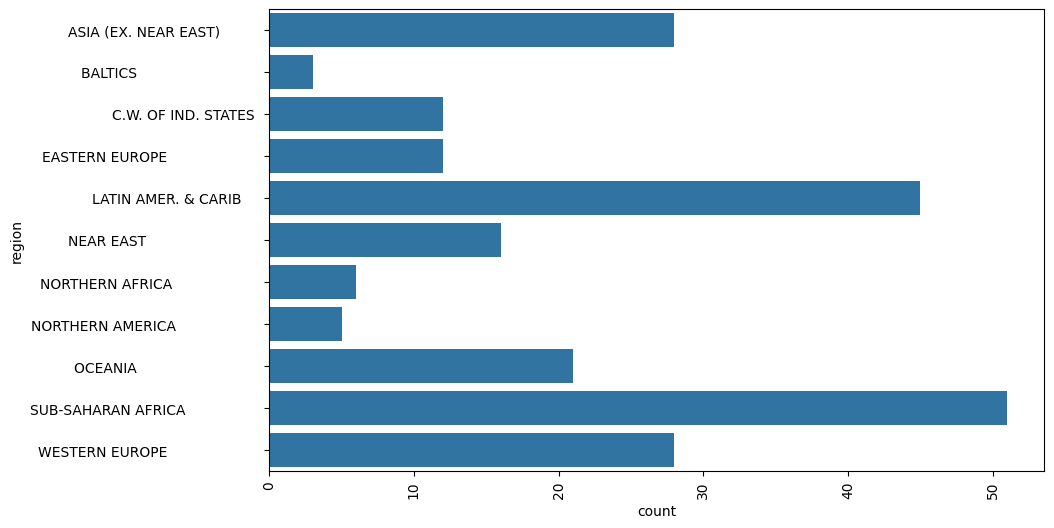

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

In [23]:
df_n = df.select_dtypes(include=['int','float'])
features = list(df_n.columns)

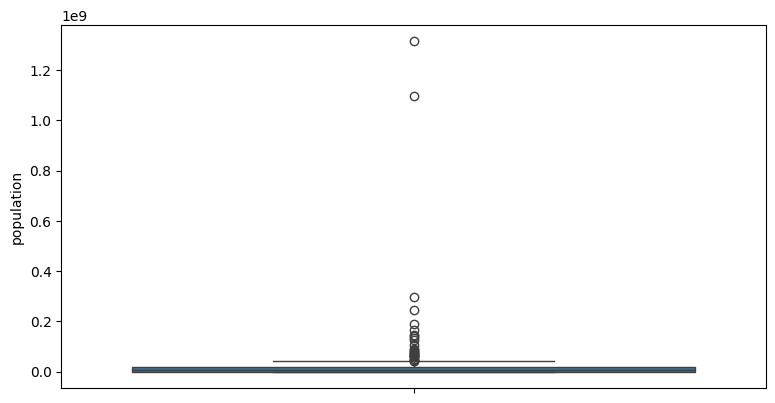

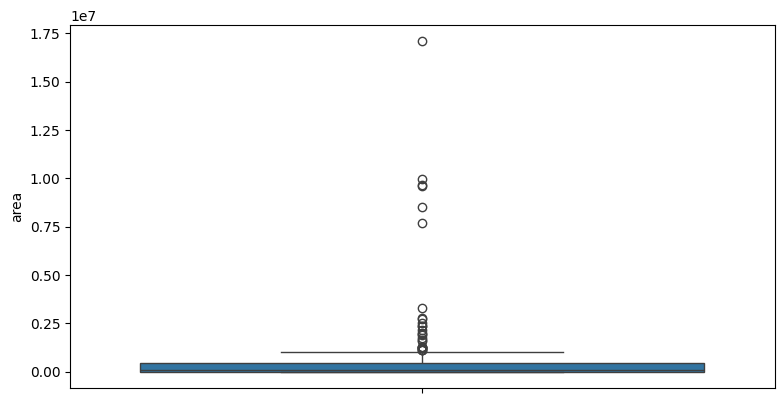

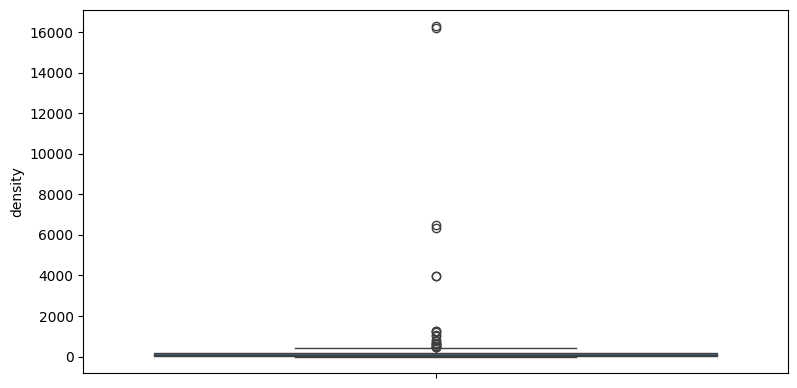

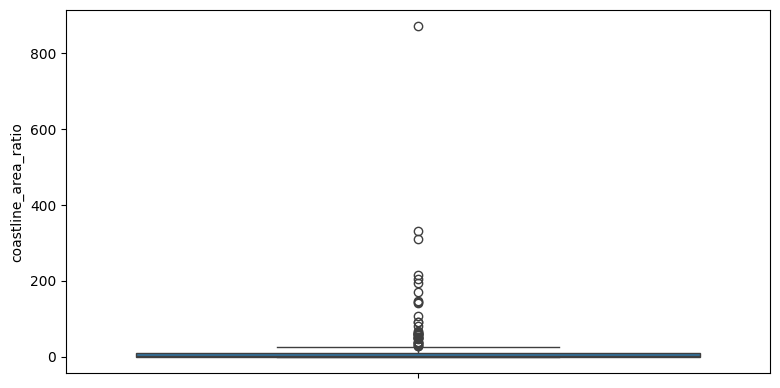

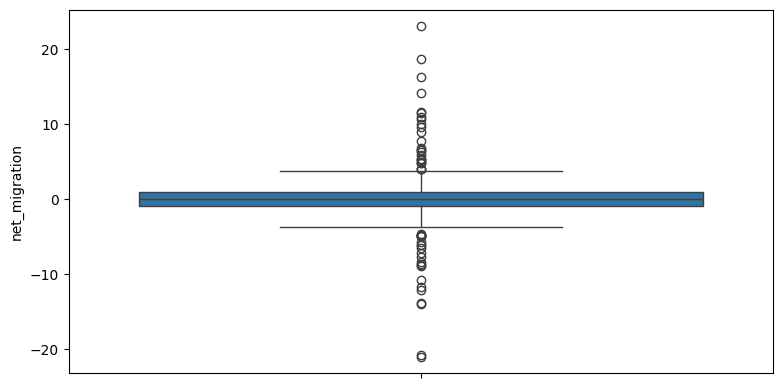

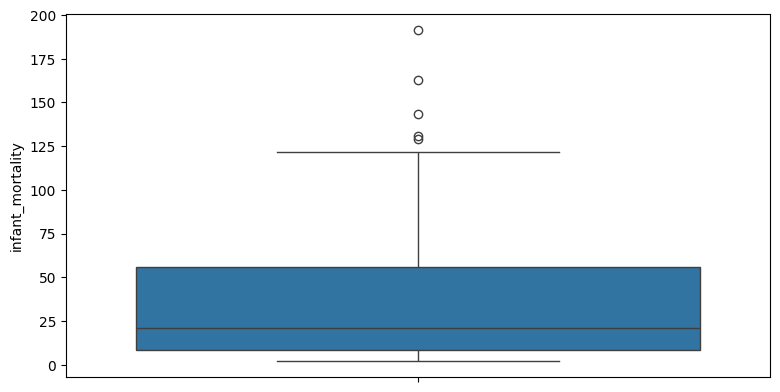

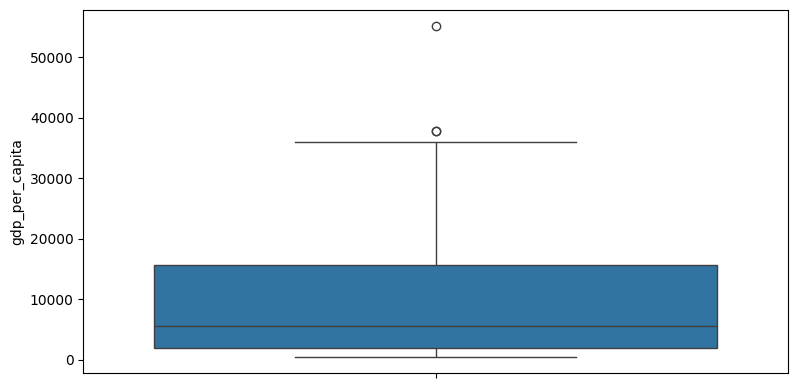

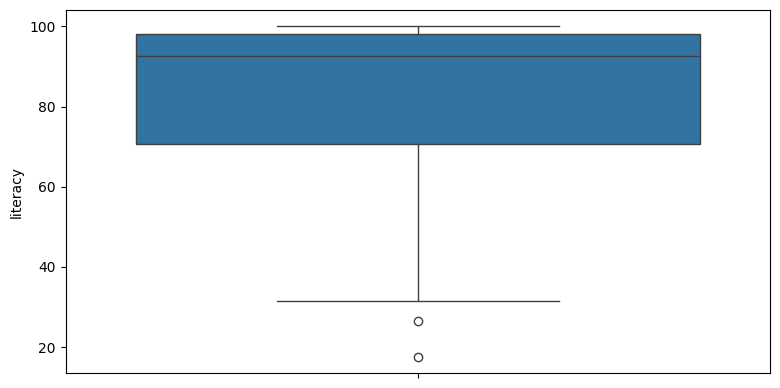

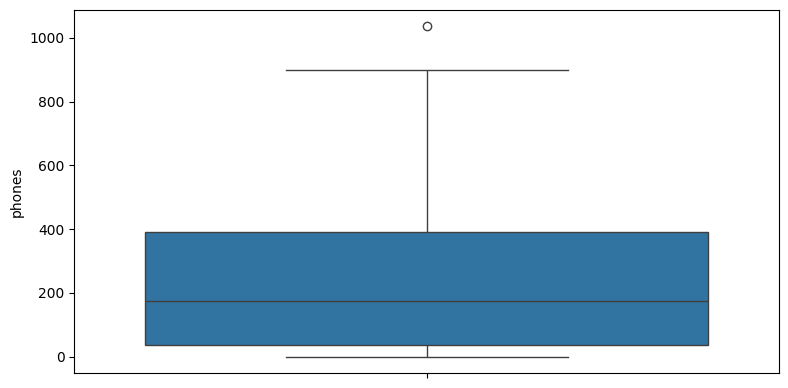

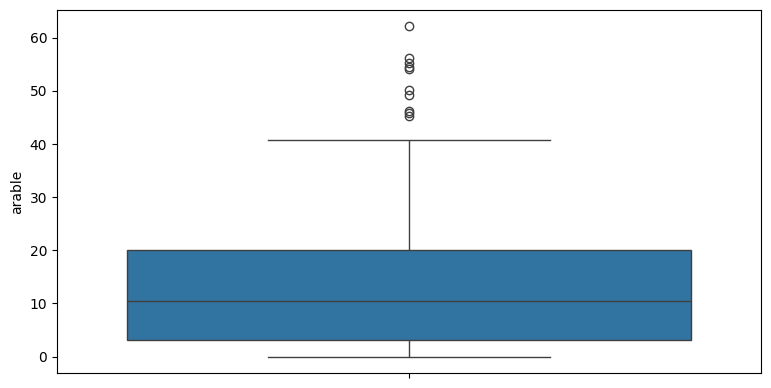

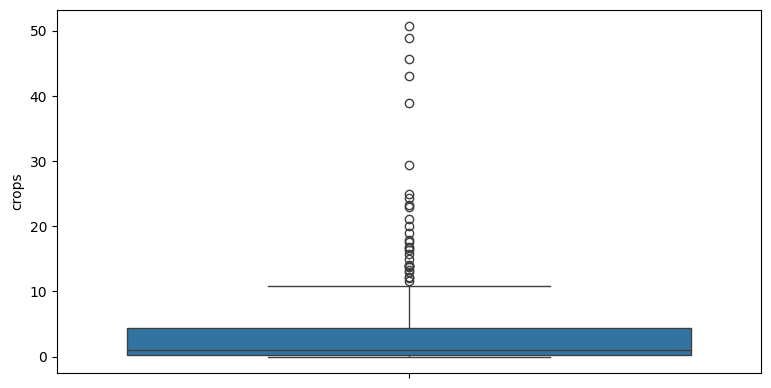

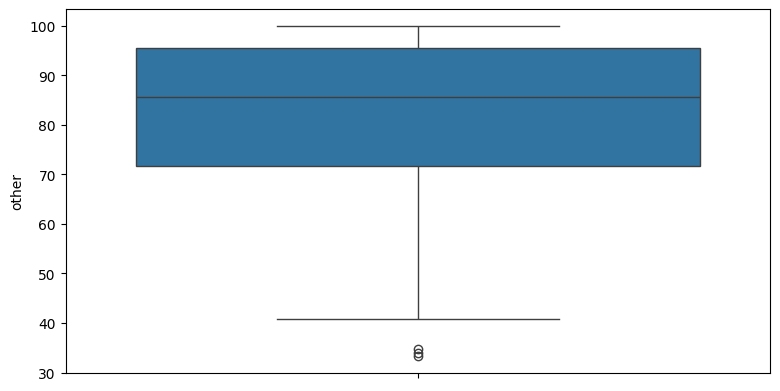

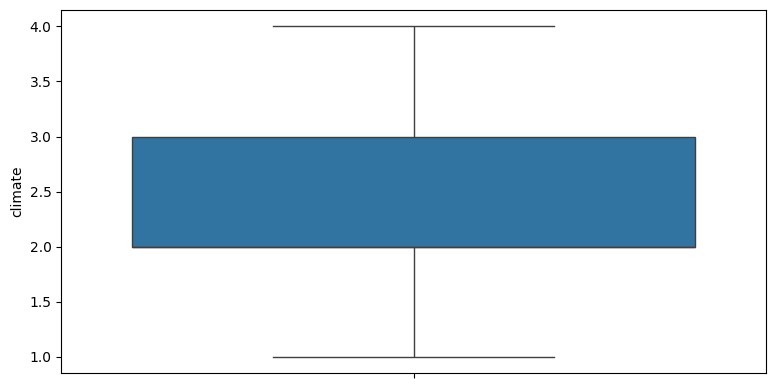

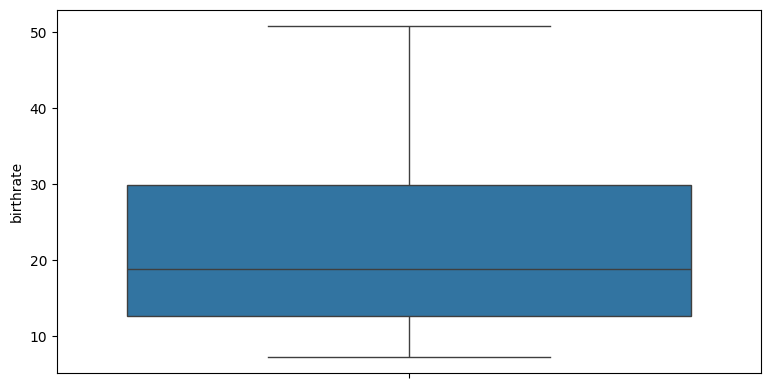

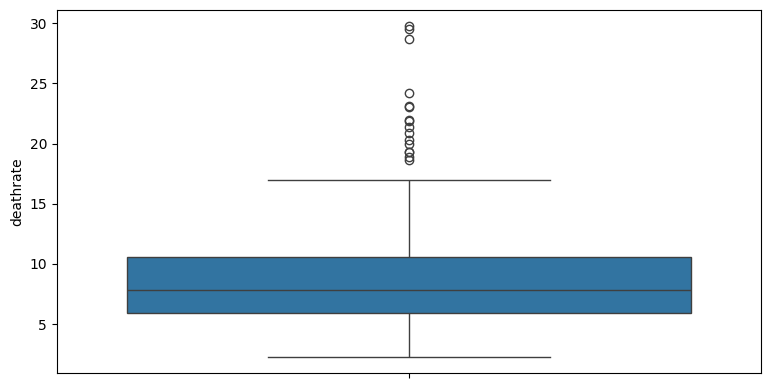

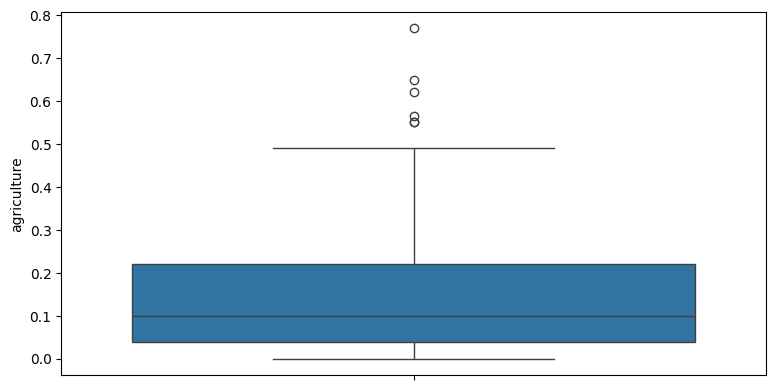

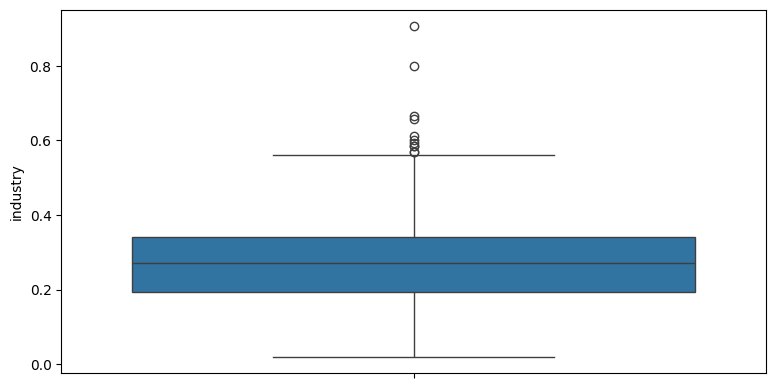

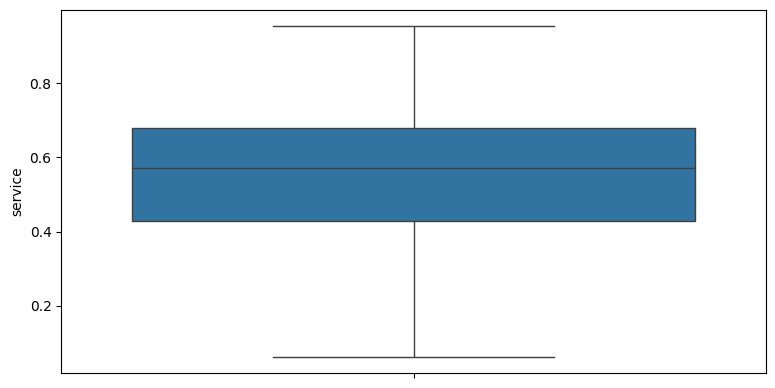

In [24]:
for i,j in enumerate(features):
  plt.figure(figsize=(20,50))
  plt.subplot(9,2,i+1)
  sns.boxplot(df_n[j])
  plt.show()

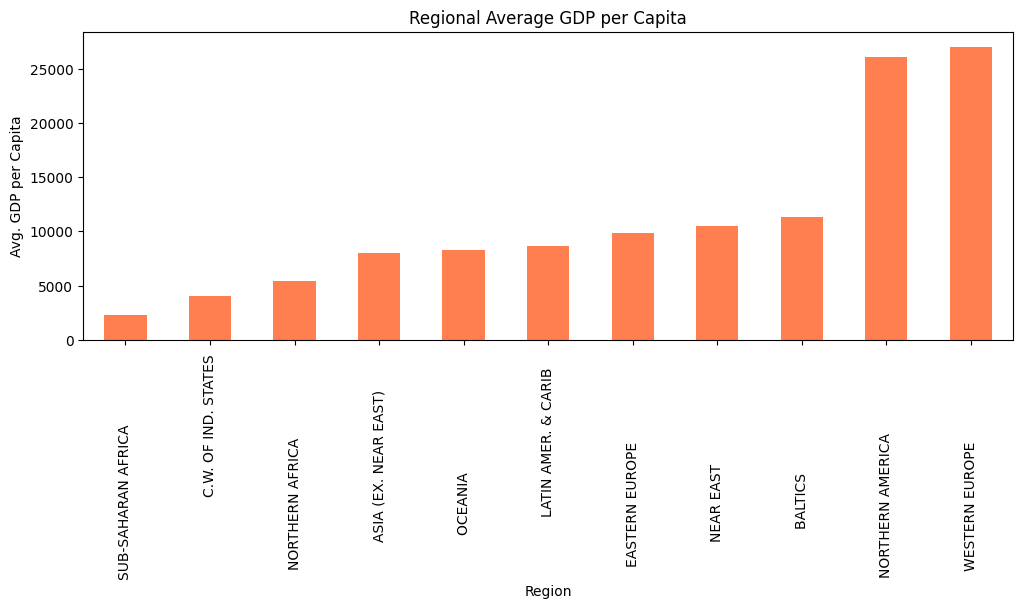

In [25]:
fig = plt.figure(figsize=(12, 4))
df.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

<Figure size 1200x1200 with 0 Axes>

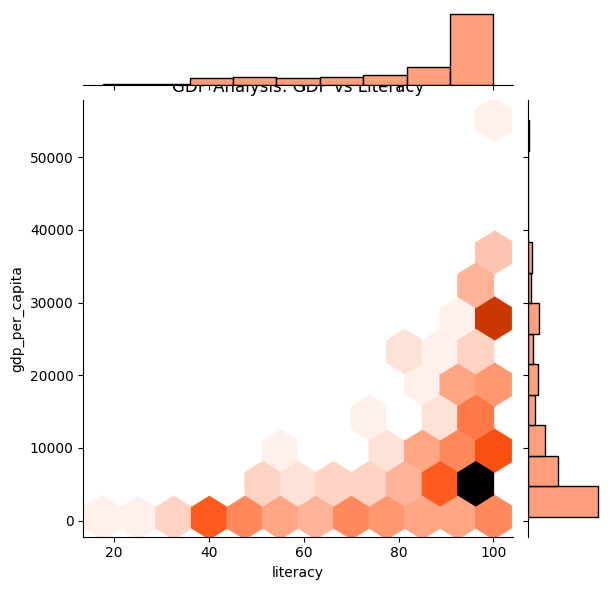

In [26]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data=df, x= 'literacy', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.title('GDP Analysis: GDP vs Literacy')
plt.show()



<Figure size 1200x1200 with 0 Axes>

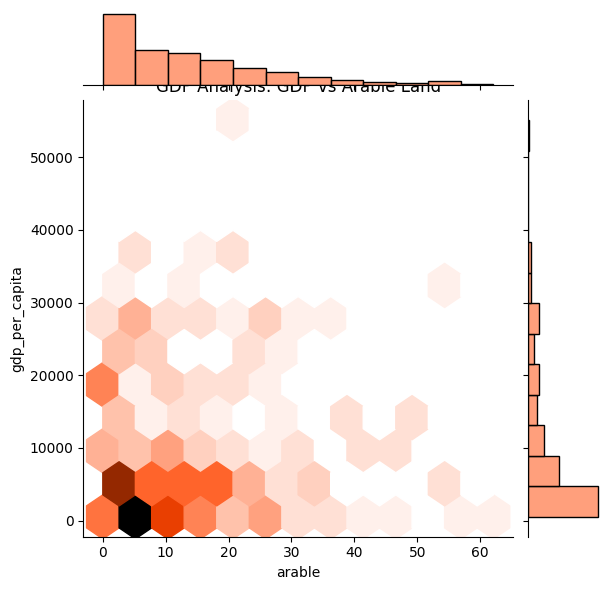

In [27]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= df, x= 'arable', y= 'gdp_per_capita', kind= 'hex', color='coral')
plt.title('GDP Analysis: GDP vs Arable Land')
plt.show()


In [28]:
# literacy = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['Literacy']]

literacy = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['literacy']] # Make sure to use the correct column name, 'literacy' instead of 'Literacy'

<Figure size 1200x1200 with 0 Axes>

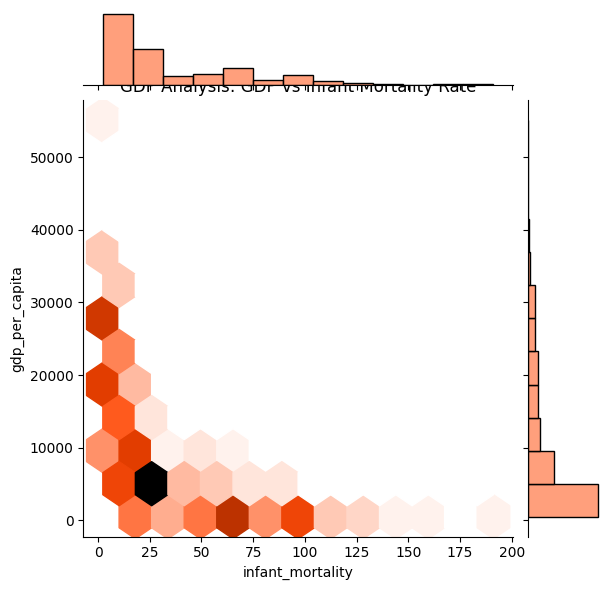

In [29]:

fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= df, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.title('GDP Analysis: GDP vs Infant Mortality Rate')
plt.show()



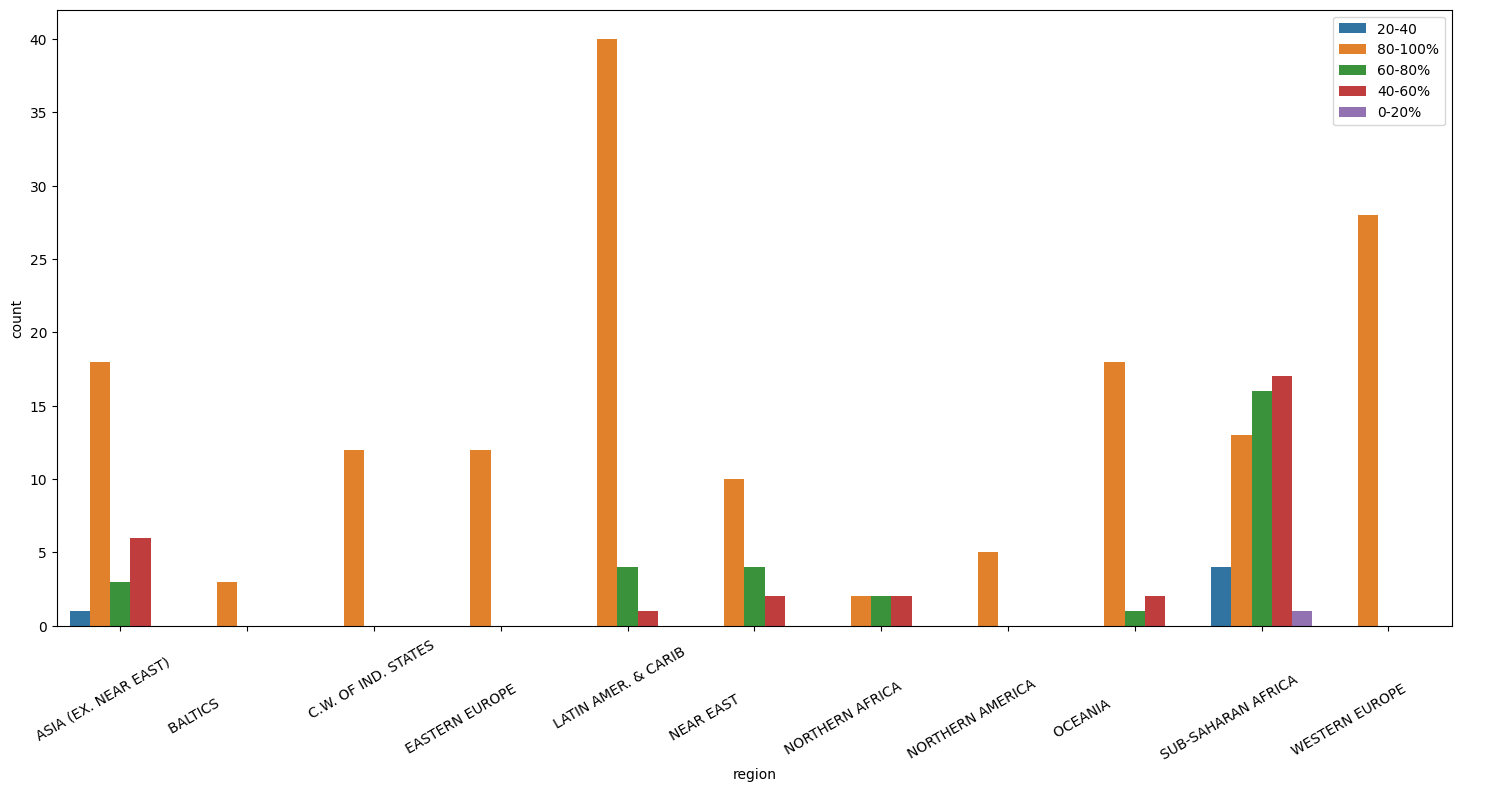

In [30]:
df['literacy_group'] = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['literacy']] # Create a new column in the DataFrame to store the literacy groups

plt.figure(figsize=(18,8))
sns.countplot(data=df, x='region', hue='literacy_group') # Use the new column as the hue
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

In [31]:
arable = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['arable']] # Make sure to use the correct column name. Removed the '(%)' since it is likely not part of the actual column name.

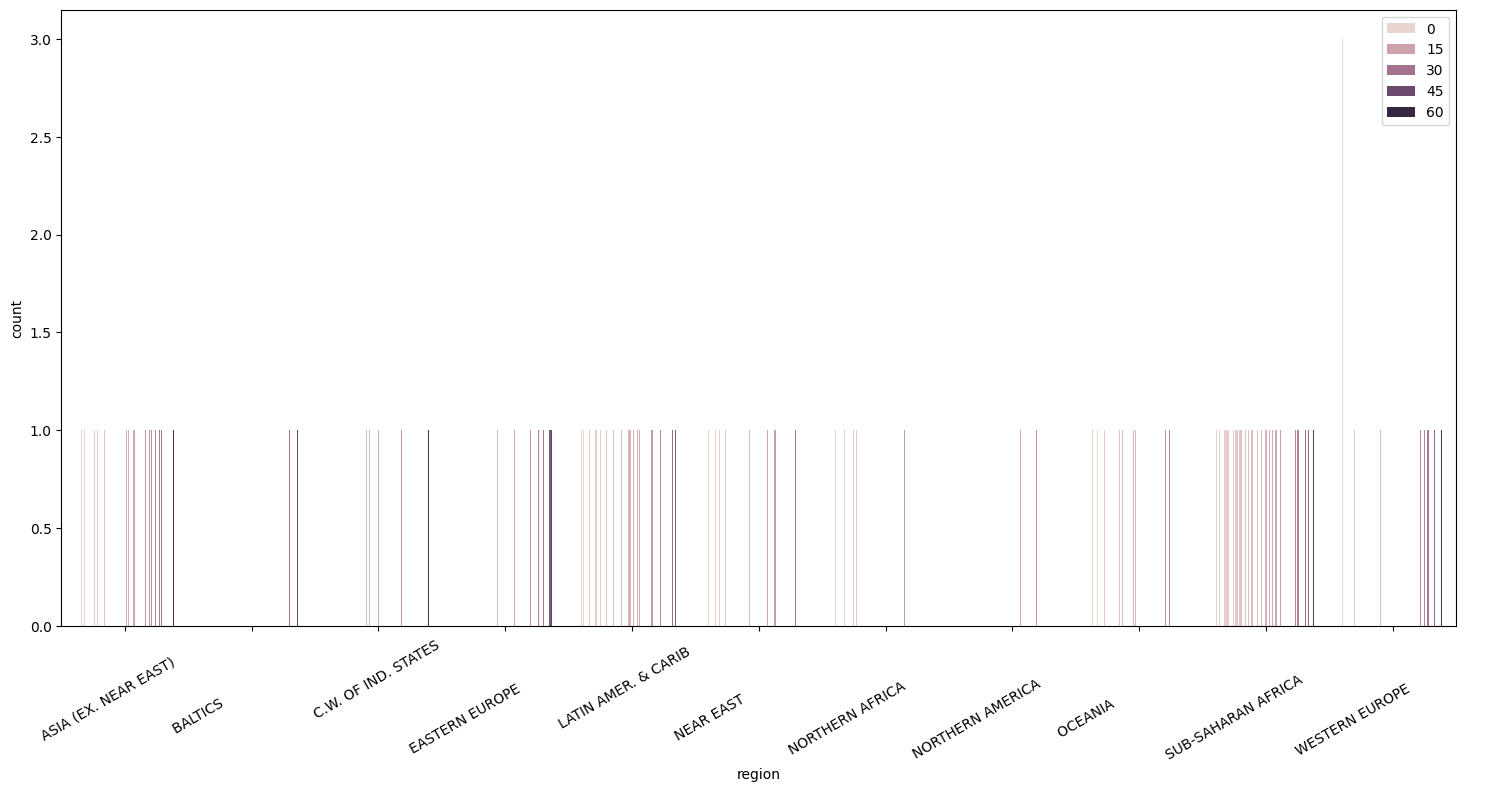

In [32]:


plt.figure(figsize=(18,8))
sns.countplot(data=df, x='region', hue='arable') # Use the new column as the hue
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

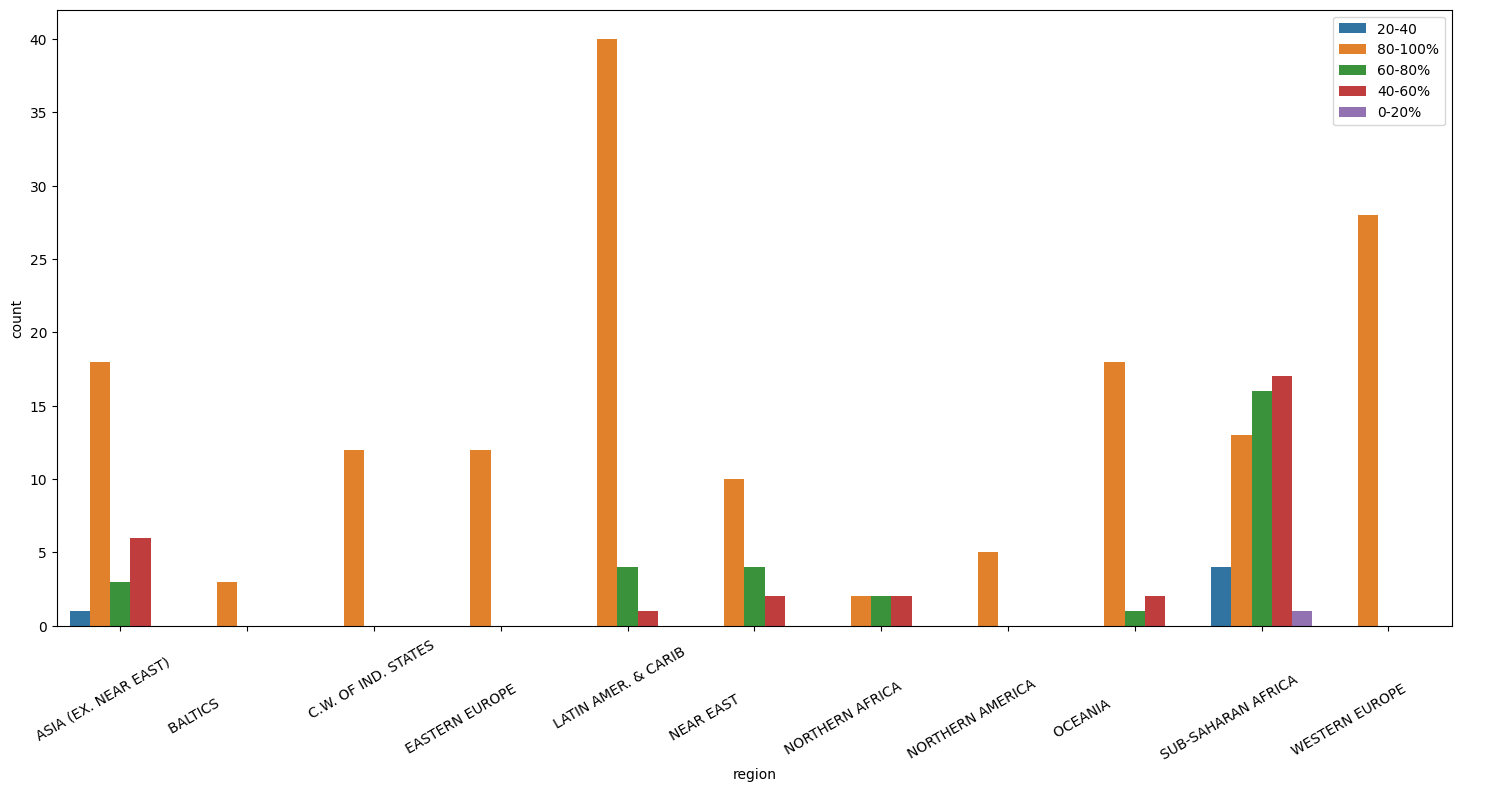

In [33]:
df['crop_group'] = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['literacy']] # Create a new column in the DataFrame to store the literacy groups

plt.figure(figsize=(18,8))
sns.countplot(data=df, x='region', hue='crop_group') # Use the new column as the hue
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

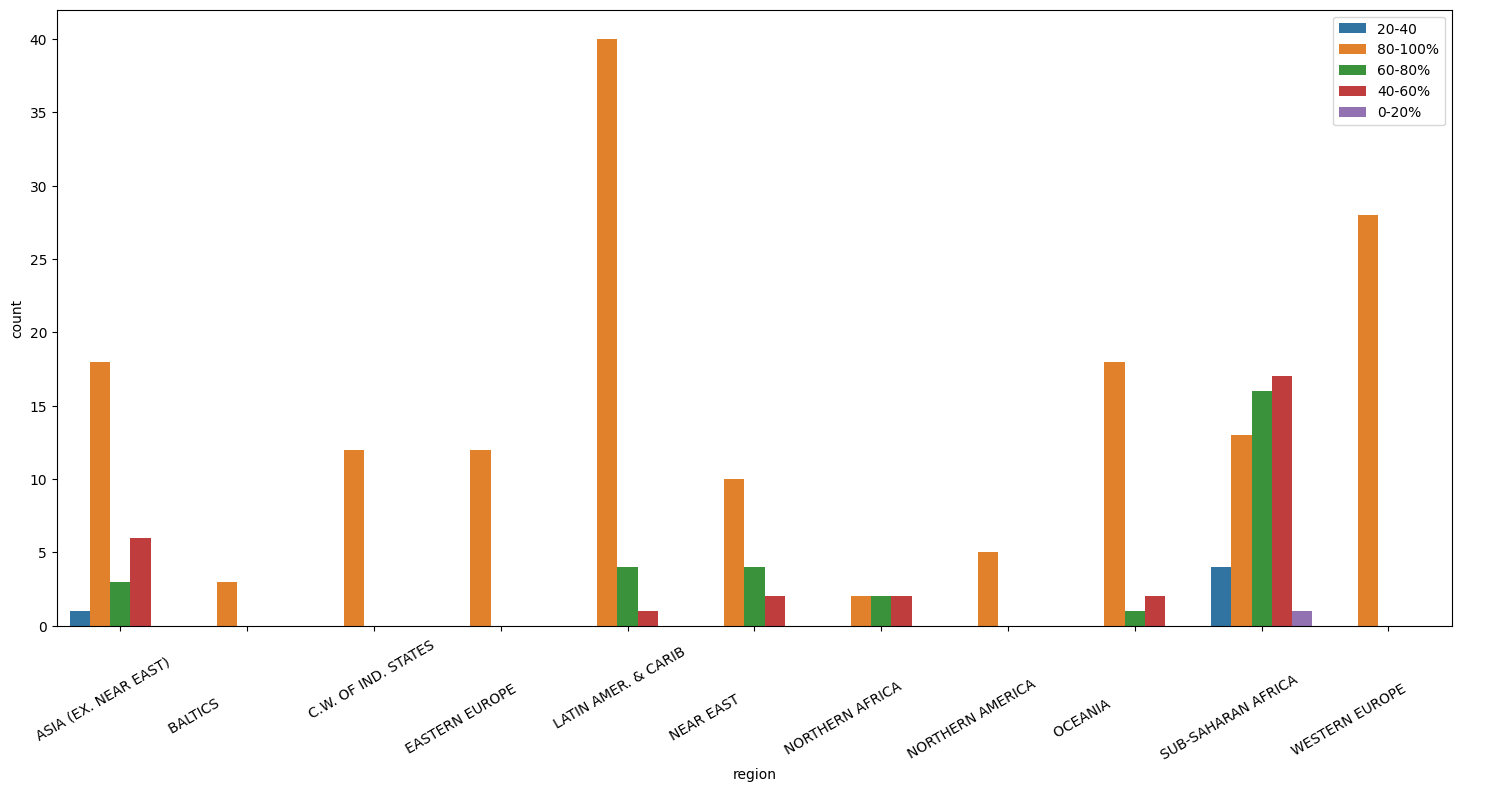

In [34]:
df['others_group'] = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['literacy']] # Create a new column in the DataFrame to store the literacy groups

plt.figure(figsize=(18,8))
sns.countplot(data=df, x='region', hue='others_group') # Use the new column as the hue
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

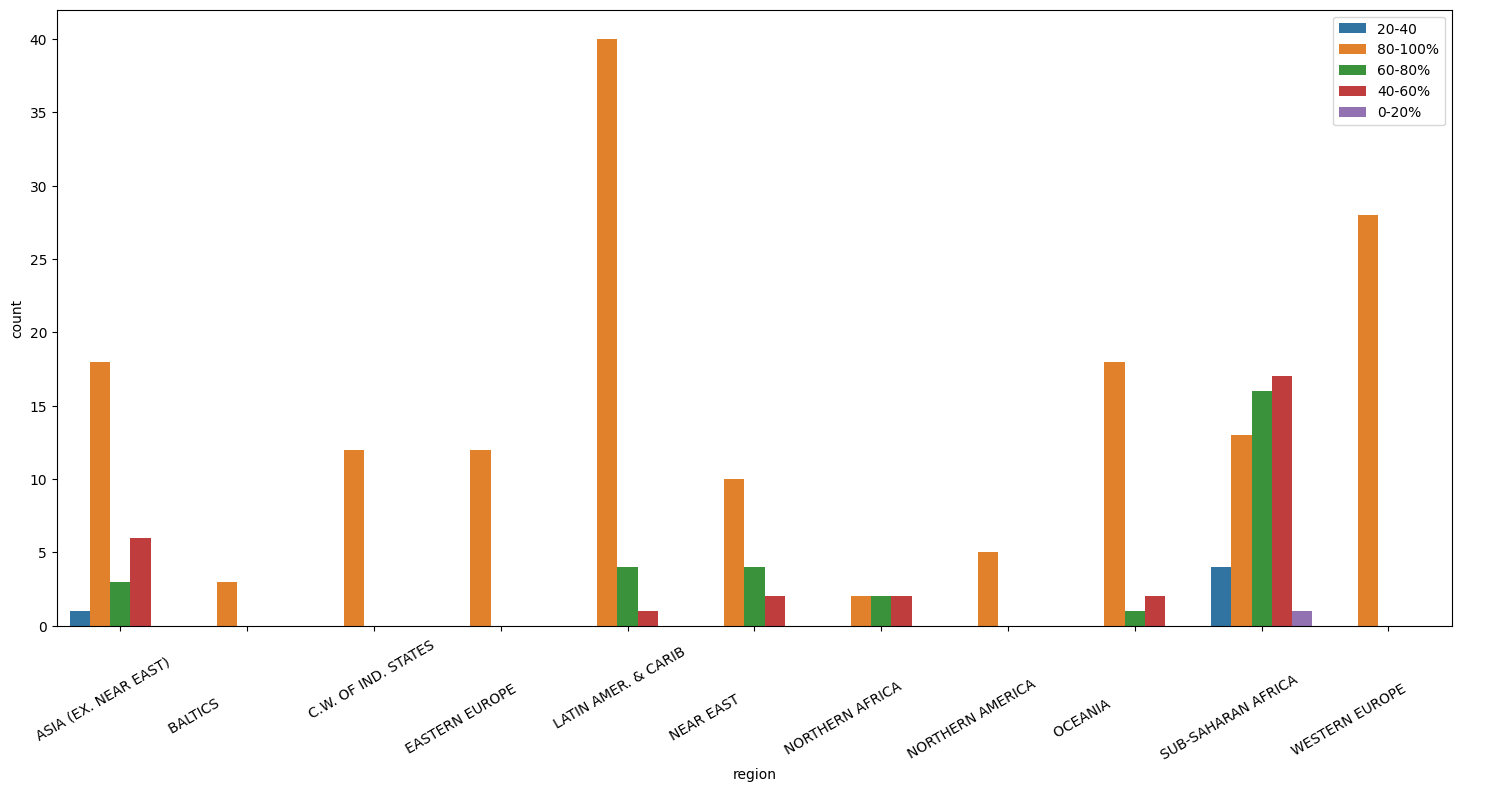

In [35]:
df['gdp_group'] = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['literacy']] # Create a new column in the DataFrame to store the literacy groups

plt.figure(figsize=(18,8))
sns.countplot(data=df, x='region', hue='gdp_group') # Use the new column as the hue
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

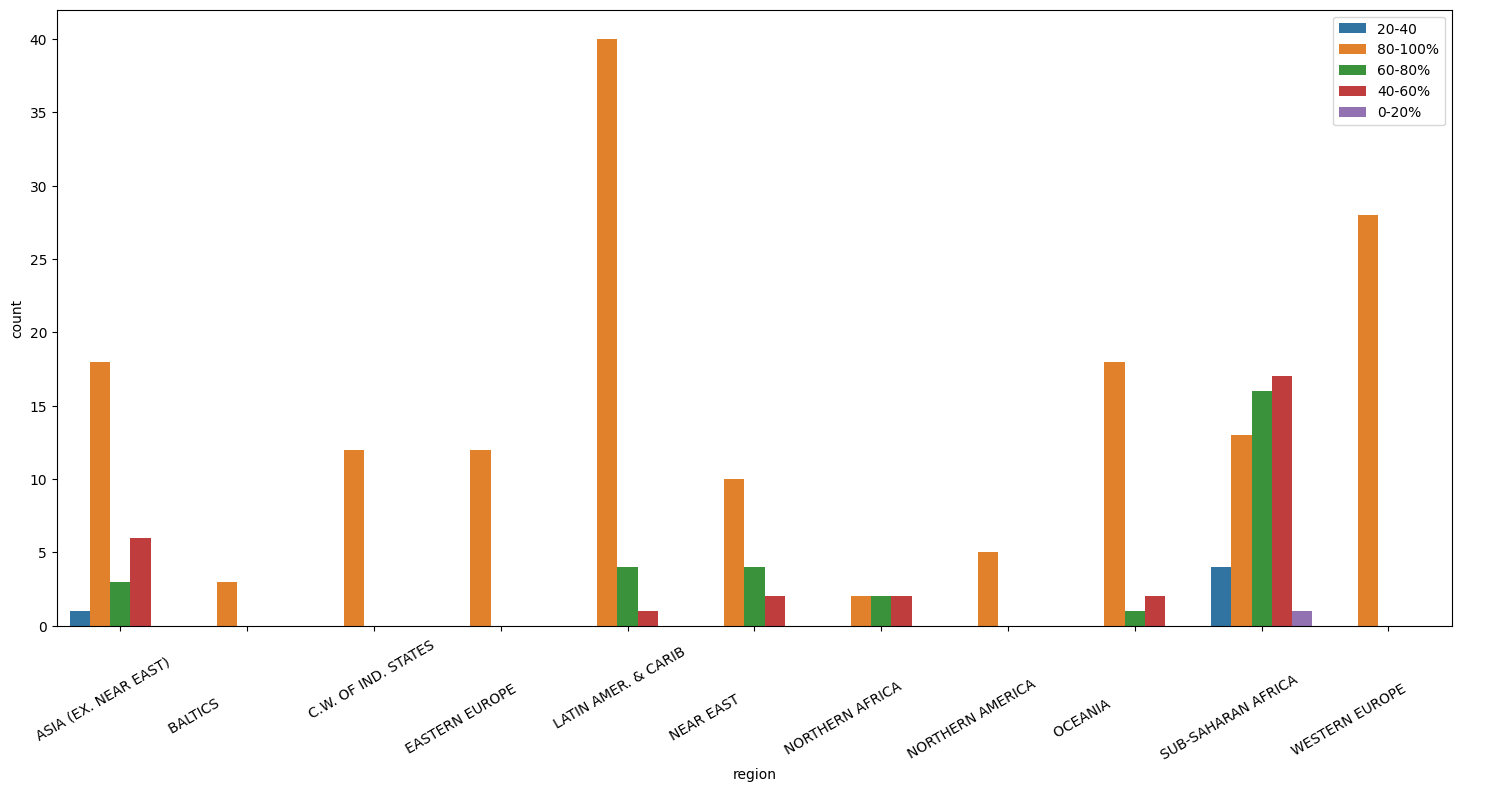

In [36]:
df['population_group'] = ['0-20%' if x <= 20.0 else '20-40' if x>20.0 and x <= 40.0 else '40-60%' if x > 40.0 and x<=60.0  else  '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in df['literacy']] # Create a new column in the DataFrame to store the literacy groups

plt.figure(figsize=(18,8))
sns.countplot(data=df, x='region', hue='population_group') # Use the new column as the hue
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()

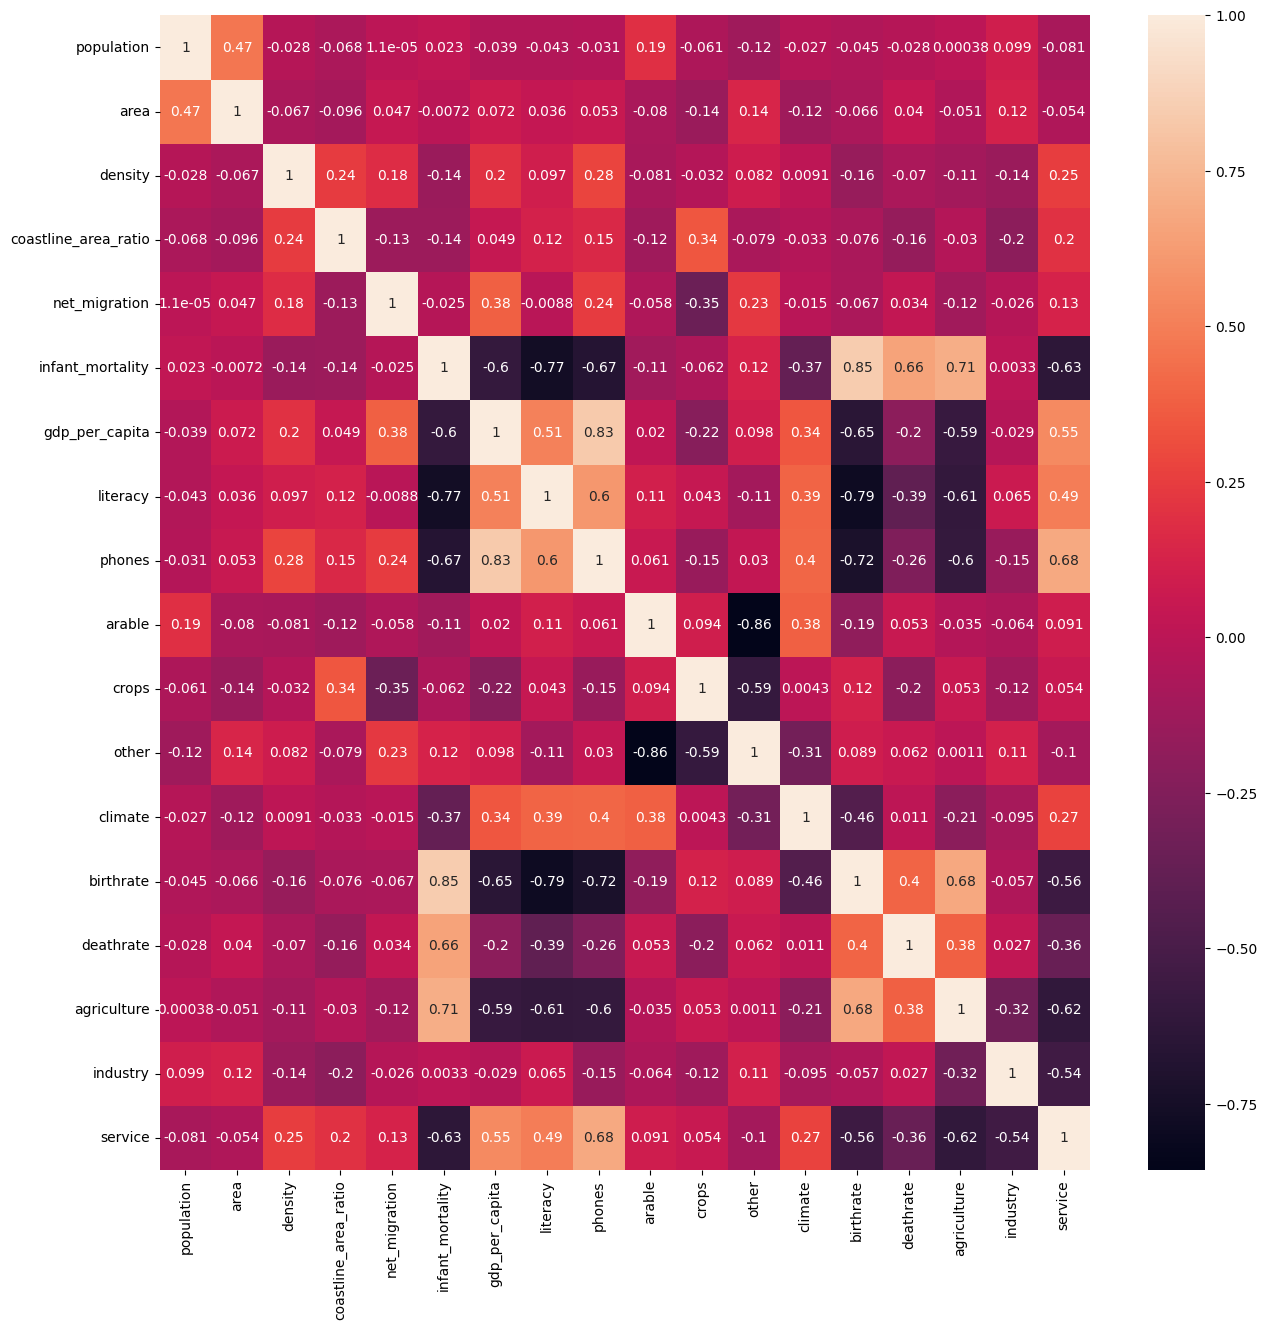

In [37]:


# Assuming 'df' is your DataFrame
plt.figure(figsize=(15,15))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float', 'int'])  # Select numerical columns
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [38]:
df.describe(include='all')

,country,region,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,...,birthrate,deathrate,agriculture,industry,service,literacy_group,crop_group,others_group,gdp_group,population_group
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,...,224.000000,223.000000,212.000000,211.000000,212.000000,227,227,227,227,227
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,80-100%,80-100%,80-100%,80-100%,80-100%
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,161,161,161,161,161
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,...,22.114732,9.241345,0.150844,0.282711,0.565283,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,...,11.176716,4.990026,0.146798,0.138272,0.165841,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,...,7.290000,2.290000,0.000000,0.020000,0.062000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,...,12.672500,5.910000,0.037750,0.193000,0.429250,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,...,18.790000,7.840000,0.099000,0.272000,0.571000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,...,29.820000,10.605000,0.221000,0.341000,0.678500,NaN,NaN,NaN,NaN,NaN


In [39]:
# Check the existing column names in your DataFrame
print(df.columns)

# Correct the column names in the drop method if needed,
# ensuring they match the output of df.columns exactly.
df.drop(['other', 'infant_mortality', 'country'], axis=1, inplace=True)

Index(['country', 'region', 'population', 'area', 'density',
       'coastline_area_ratio', 'net_migration', 'infant_mortality',
       'gdp_per_capita', 'literacy', 'phones', 'arable', 'crops', 'other',
       'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service', 'literacy_group', 'crop_group', 'others_group', 'gdp_group',
       'population_group'],
      dtype='object')


In [40]:
# Check the existing column names in your DataFrame
print(df.columns)

# Replace 'phones (per 1000)' with the actual name
# of the column you want to check, as it appears in the output above
np.where(df['phones'] > 1000)

Index(['region', 'population', 'area', 'density', 'coastline_area_ratio',
       'net_migration', 'gdp_per_capita', 'literacy', 'phones', 'arable',
       'crops', 'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service', 'literacy_group', 'crop_group', 'others_group', 'gdp_group',
       'population_group'],
      dtype='object')


(array([138]),)

In [41]:
df.isnull().sum(axis=1).sort_values(ascending=False)[0:10]

223    8
221    6
134    6
78     5
174    4
177    4
140    4
80     4
144    4
171    4
dtype: int64

In [42]:
df.drop([223,221,134,78,138],axis=0,inplace=True)

In [43]:
df.reset_index(drop=True,inplace=True)

In [44]:
df.isnull().sum()

region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            1
gdp_per_capita           0
literacy                15
phones                   3
arable                   1
crops                    1
climate                 20
birthrate                1
deathrate                2
agriculture             11
industry                11
service                 11
literacy_group           0
crop_group               0
others_group             0
gdp_group                0
population_group         0
dtype: int64

In [45]:
df['climate']=df['climate'].fillna(df['climate'].mode().max())

In [46]:
nullFeatures=list(df.columns) # Changed 'colums' to 'columns'

for i,j in enumerate(nullFeatures):
    if df[j].isnull().sum()!=0:
       df[j]=df[j].fillna(df[j].mean())

In [47]:
# Log transformation and square root transform on outliers

# Check if 'Area (sq. mi.)' column exists before applying transformation
if 'Area (sq. mi.)' in df.columns:
    df['population'] = np.log(df['population'])
    df['Area (sq. mi.)'] = np.log(df['Area (sq. mi.)'])  # Apply log transformation if column exists
    df['Pop.Density (per sq. mi.)'] = np.sqrt(df['Pop.Density (per sq. mi.)'])
    df['Coastline (coast/area ratio)'] = np.sqrt(df['Coastline (coast/area ratio)'])
    # df['Net migration']=np.sqrt(df['Net migration])
    df['GDP ($ per capita)'] = np.log(df['GDP ($ per capita)'])
    df['Phones (per 1000)'] = np.sqrt(df['Phones (per 1000)'])
    df['Arable (%)'] = np.sqrt(df['Arable (%)'])
    df['Crops (%)'] = np.log1p(df['Crops'])
    df['Deathrate'] = np.log(df['Deathrate'])
    df['Agriculture'] = np.sqrt(df['Agriculture'])
    df['Industry'] = np.sqrt(df['Industry'])
else:
    print("Column 'Area (sq. mi.)' not found in DataFrame.")

# Check if columns exist before dropping
if 'Literacy (%)' in df.columns and 'Net migration' in df.columns:
    # 'Literacy (%)' feature contains outliers even after transformation. so, removing this features
    df.drop(['Literacy (%)', 'Net migration'], axis=1, inplace=True)
else:
    # Handle the case where columns are not found
    missing_columns = [col for col in ['Literacy (%)', 'Net migration'] if col not in df.columns]
    print(f"The following columns were not found and cannot be dropped: {missing_columns}")

Column 'Area (sq. mi.)' not found in DataFrame.
The following columns were not found and cannot be dropped: ['Literacy (%)', 'Net migration']


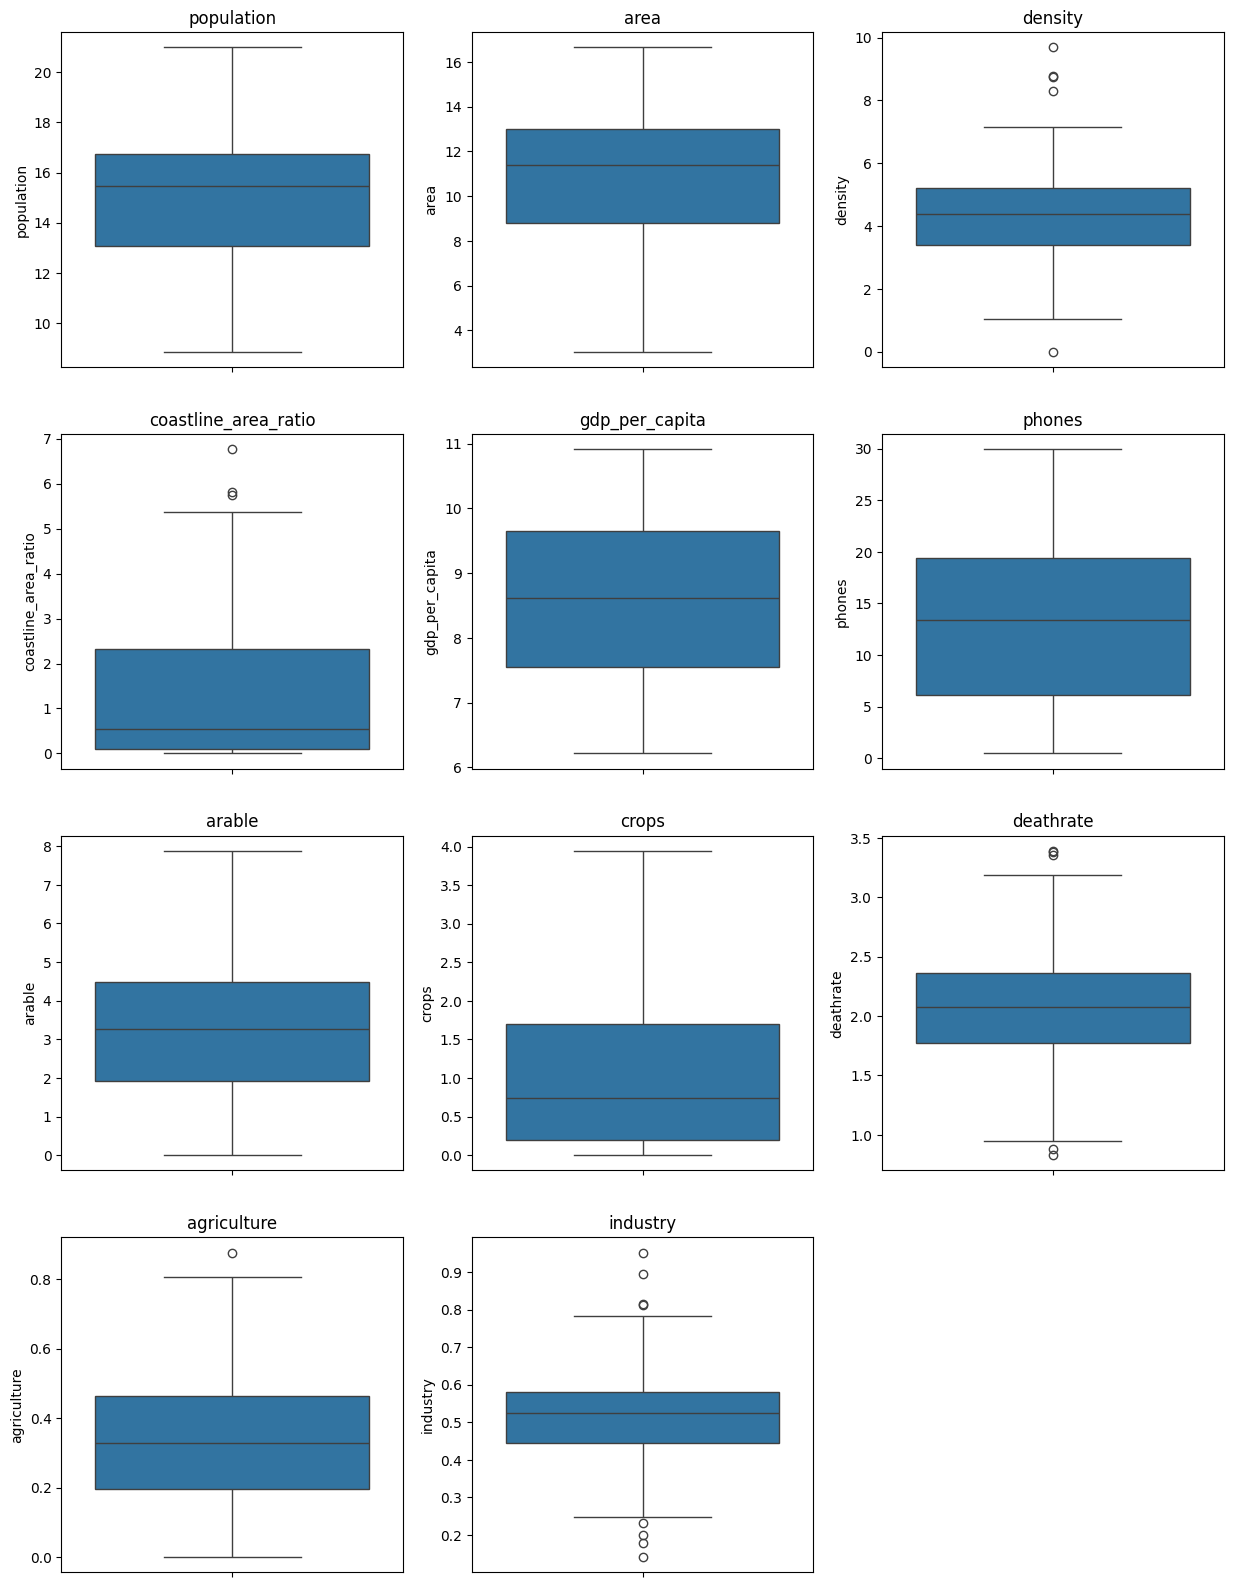

In [48]:
# Defining a function to plot and handle exceptions
def plot_column(df, col_name, transform_func, subplot_index):
    try:
        plt.subplot(4, 3, subplot_index)
        transformed_data = transform_func(df[col_name])
        sns.boxplot(transformed_data)
        plt.title(col_name)
    except Exception as e:
        print(f"Error plotting {col_name}: {e}")

plt.figure(figsize=(15, 20))

plot_column(df, "population", np.log, 1)
plot_column(df, "area", np.log, 2)
plot_column(df, "density", np.log1p, 3)
plot_column(df, "coastline_area_ratio", np.log1p, 4)
# Skipping 'net_migration' since it's removed
plot_column(df, "gdp_per_capita", np.log, 5)
plot_column(df, "phones", np.sqrt, 6)
plot_column(df, "arable", np.sqrt, 7)
plot_column(df, "crops", np.log1p, 8)
plot_column(df, "deathrate", np.log, 9)
plot_column(df, "agriculture", np.sqrt, 10)
plot_column(df, "industry", np.sqrt, 11)

plt.show()

In [49]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])


In [50]:
numeric_cols = df.select_dtypes(include=['number']).columns

x = df[numeric_cols].drop('gdp_per_capita', axis=1)
y = df['gdp_per_capita']

# Splitting into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=10)


In [51]:
st = StandardScaler()

# Scaling the training and testing features
xtrain_scaled = st.fit_transform(xtrain)
xtest_scaled = st.transform(xtest)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


def linear_reg(xtrain_scaled, xtest_scaled, ytrain, ytest):
    # Initialize LinearRegression model
    lr = LinearRegression()

    # Fit the model on training data
    lr.fit(xtrain_scaled, ytrain)

    # Predict on test data
    ypred = lr.predict(xtest_scaled)

    # Calculate R^2 score
    score = r2_score(ytest, ypred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))

    # Print model evaluation metrics
    print("Linear Regression model:")
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

# Assuming xtrain_scaled, xtest_scaled, ytrain, ytest are defined elsewhere
# Call the function
linear_reg(xtrain_scaled, xtest_scaled, ytrain, ytest)

Linear Regression model:
Score for Linear Regression model is 0.6165295036910291
RMSE for Linear Regression model is 6239.698077716491


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


def random_forest_regressor(xtrain_scaled, xtest_scaled, ytrain, ytest):
    # Initialize Random Forest Regressor model
    rf = RandomForestRegressor()

    # Fit the model on training data
    rf.fit(xtrain_scaled, ytrain)

    # Predict on test data
    ypred = rf.predict(xtest_scaled)

    # Calculate R^2 score
    score = r2_score(ytest, ypred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))

    # Print model evaluation metrics
    print("Random Forest Regressor Model:")
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))

# Assuming xtrain_scaled, xtest_scaled, ytrain, ytest are defined elsewhere
# Call the function
random_forest_regressor(xtrain_scaled, xtest_scaled, ytrain, ytest)

Random Forest Regressor Model:
Score for Random Forest Regressor Model is 0.8084290577121718
RMSE for Random Forest Regressor Model is 4410.24194855295


In [54]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


def svr(xtrain_scaled, xtest_scaled, ytrain, ytest):
    # Initialize SVR model
    svr = SVR()

    # Fit the model on training data
    svr.fit(xtrain_scaled, ytrain)

    # Predict on test data
    ypred = svr.predict(xtest_scaled)

    # Calculate R^2 score
    score = r2_score(ytest, ypred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))

    # Print model evaluation metrics
    print("SVR Model:")
    print('Score for SVR Model is {}'.format(score))
    print('RMSE for SVR Model is {}'.format(rmse))

# Assuming xtrain_scaled, xtest_scaled, ytrain, ytest are defined elsewhere
# Call the function
svr(xtrain_scaled, xtest_scaled, ytrain, ytest)

SVR Model:
Score for SVR Model is -0.08743358097566012
RMSE for SVR Model is 10507.489585239138


In [55]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def model_compare(xtrain_scaled, xtest_scaled, ytrain, ytest):
    print("Comparing Models:")
    print('-' * 100)
    linear_reg(xtrain_scaled, xtest_scaled, ytrain, ytest)
    print('-' * 100)
    random_forest_regressor(xtrain_scaled, xtest_scaled, ytrain, ytest)
    print('-' * 100)
    svr(xtrain_scaled, xtest_scaled, ytrain, ytest)
    print('-' * 100)

# Assuming xtrain_scaled, xtest_scaled, ytrain, ytest are defined elsewhere
# Call the function
model_compare(xtrain_scaled, xtest_scaled, ytrain, ytest)

Comparing Models:
----------------------------------------------------------------------------------------------------
Linear Regression model:
Score for Linear Regression model is 0.6165295036910291
RMSE for Linear Regression model is 6239.698077716491
----------------------------------------------------------------------------------------------------
Random Forest Regressor Model:
Score for Random Forest Regressor Model is 0.8016942204891416
RMSE for Random Forest Regressor Model is 4487.095201049738
----------------------------------------------------------------------------------------------------
SVR Model:
Score for SVR Model is -0.08743358097566012
RMSE for SVR Model is 10507.489585239138
----------------------------------------------------------------------------------------------------


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import pickle


# Assuming xtrain_scaled, xtest_scaled, ytrain, and ytest are defined elsewhere
# Assuming st is the initialized StandardScaler

# Initialize RandomForestRegressor and fit it
rf = RandomForestRegressor()
rf.fit(xtrain_scaled, ytrain)

# Predict on xtest_scaled
ypred = rf.predict(xtest_scaled)

# Scale the entire dataset x using the trained StandardScaler st
x_sc = st.transform(x)

# Perform cross-validation on the entire dataset
cv = cross_val_score(rf, x_sc, y, cv=5)
cv_mean = np.mean(cv)


# Save the trained model using pickle
pickle.dump(rf, open('model.pkl', 'wb'))